### Context
A tip is considered as a monetary incentive that is given by the customers or guests for polite, prompt, and efficient service provided by the staff. The practice of giving tips has been continuing for a very long time and has become particularly popular in service industries such as hotels and restaurants.

### Objective
Chef's Kitchen is one of the most popular restaurants in the city of San Diego and acts as a one-stop destination for food lovers. The polite and efficient service provided by the restaurant staff often gets them tips from the customer. As a Data Analyst for the restaurant, you have been asked to analyze the data provided to identify the patterns and trends in the revenue and tips received from customers across different demographies and come up with informative visualizations to  convey the insights obtained from the analysis. <br>
<br>
The dataset consists of the following features:

- **order_id**: unique identifier of each order
- **day**: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)
- **time**: time of the day at which the customer visited the restaurant (Lunch or Dinner)
- **size**: number of people present at the table
- **smoker**: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
- **sex**: gender of the payer of the bill (Male or Female)
- **total_bill**: the bill amount in dollars
- **tip**: the tip amount in dollars


### Importing the libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# read the dataset
tips = pd.read_csv("data/4_tips.csv")

### Overview

In [3]:
# checking the data types of the columns
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


- *The `total_bill`, `tip`, `size` and `order_id` columns are numerical columns while the rest are categorical in nature.*

The primary difference between categorical and object type columns is that categorical columns help to improve the processing speed and reduces the storage space when we are working with a large dataset.

In [4]:
tips.shape # check the number of rows and columns in the dataset

(244, 8)

- *There are 244 rows and 8 columns in the dataset.*

In [5]:
tips.head() # review the first 5 rows of the dataset

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


- *The dataset contains information about the customers who are visiting the restaurant*
- *It contains details about the day and time at which the customer has visited the restaurant and gives information about their billing and tip amount.* 

Let us drop the `order_id` column from our dataset as it will not add any value to our analysis since it is an  unique identifier.

In [6]:
tips.drop('order_id', axis=1, inplace=True)

Let's print the head of the dataset to verify that the `order_id` column has been successfully dropped.

In [7]:
tips.head()

,day,time,size,smoker,sex,total_bill,tip
0,Sun,Dinner,2,No,Female,16.99,1.01
1,Sun,Dinner,3,No,Male,10.34,1.66
2,Sun,Dinner,3,No,Male,21.01,3.50
3,Sun,Dinner,2,No,Male,23.68,3.31
4,Sun,Dinner,4,No,Female,24.59,3.61


The `order_id` column has been successfully dropped.

#### Getting the statistical summary for the dataset

In [8]:
tips.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0


- *The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars which indicate that most of the orders are not very costly.*
- *The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).*
- *The group size varies from 1 person to 6 people.*

#### Analyse Categorical Features

In [9]:
tips.day.value_counts(normalize=True) * 100 # check the unique values in the 'day' column

day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64

- *Most Customers visit the restaurant on Saturday followed by Sunday. Surprisingly Thursday has higher percentage than Friday*

In [10]:
tips.time.value_counts(normalize=True) * 100 # check the unique values in the 'time' column

time
Dinner    72.131148
Lunch     27.868852
Name: proportion, dtype: float64

- *About 72% of customers come for Dinner*

In [11]:
tips.smoker.value_counts(normalize=True) * 100 # check the unique values in the 'smoker' column

smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64

- *Majority of the customers prefer non smoking tables (about 62%)*

In [12]:
tips.sex.value_counts(normalize=True) * 100 # check the unique values

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

- *About 64% of the time, male members pay the bill*

### Univariate Analysis Visualization

#### Understanding the distribution of `total_bill`

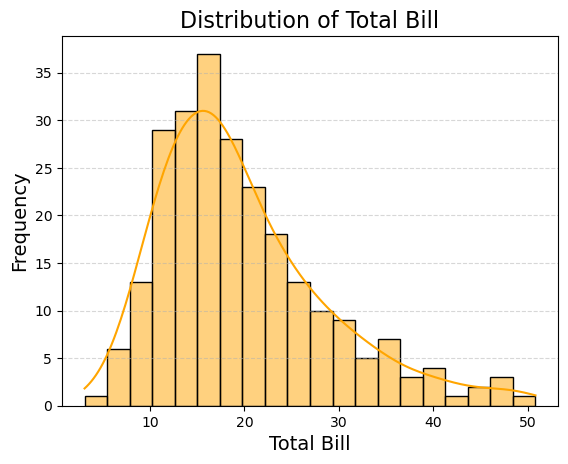

In [13]:
sns.histplot(data=tips, x='total_bill', kde=True, color='orange', bins=20);
plt.grid(axis='y', linestyle='--', alpha=0.5);
plt.title('Distribution of Total Bill', fontsize=16)
plt.xlabel('Total Bill', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

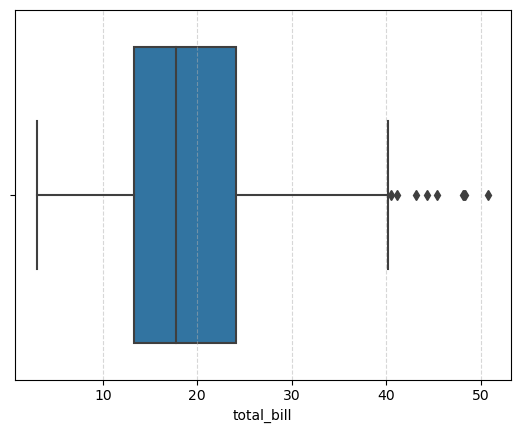

In [14]:
sns.boxplot(data=tips, x="total_bill")
plt.grid(axis='x', linestyle='--', alpha=0.5);

- *Right Skewed and have multiple outliers*

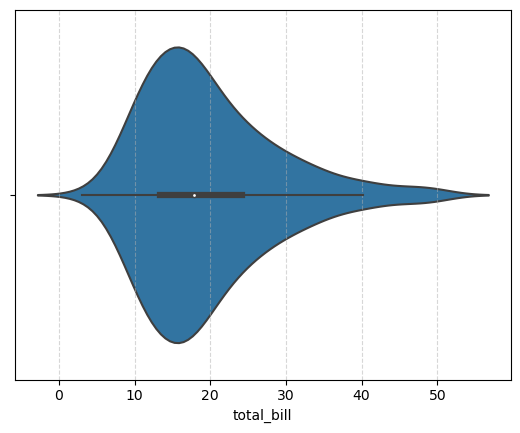

In [15]:
sns.violinplot(data=tips, x='total_bill')
plt.grid(axis='x', linestyle='--', alpha=0.5);  

- *Violin plot conveys more than boxplot in our case*
- *The `total_bill` column is slightly right-skewed.* 
- *Almost half of the customers pay less than 18 dollars for overall bill.*
- *50% of the billing amounts lie between 12 to 25 dollars.* 


#### **Understanding the distribution of `tip`**

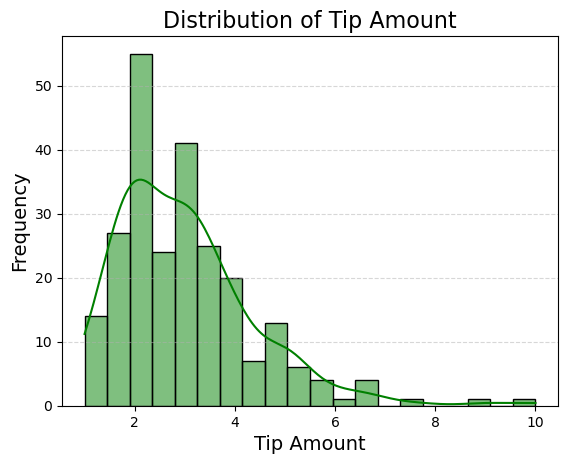

In [16]:
sns.histplot(data=tips, x='tip', kde=True, color='green', bins=20);
plt.grid(axis='y', linestyle='--', alpha=0.5);
plt.title('Distribution of Tip Amount', fontsize=16)
plt.xlabel('Tip Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

<Axes: xlabel='tip'>

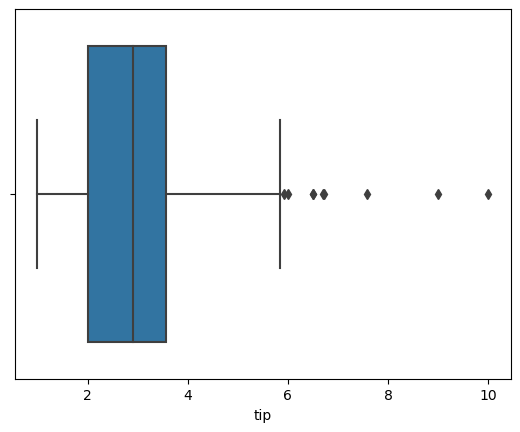

In [17]:
sns.boxplot(data=tips, x="tip")

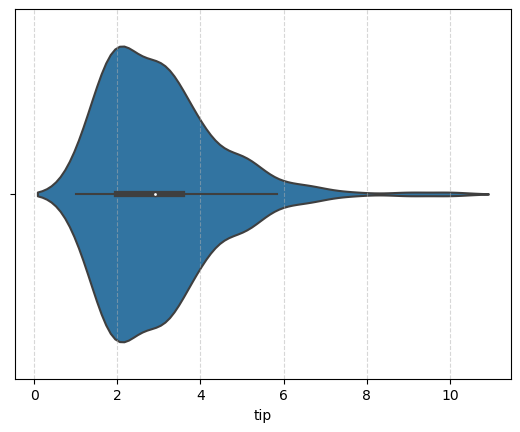

In [18]:
sns.violinplot(data=tips, x='tip');
plt.grid(axis='x', linestyle='--', alpha=0.5);


- *The `tip` column is also slightly right-skewed.* 
- *50% of the people pay less than 3 dollars as tip.*
- *Half of the tip amounts lie between 2 to 4 dollars.*

#### **Understanding the distribution of `size`**

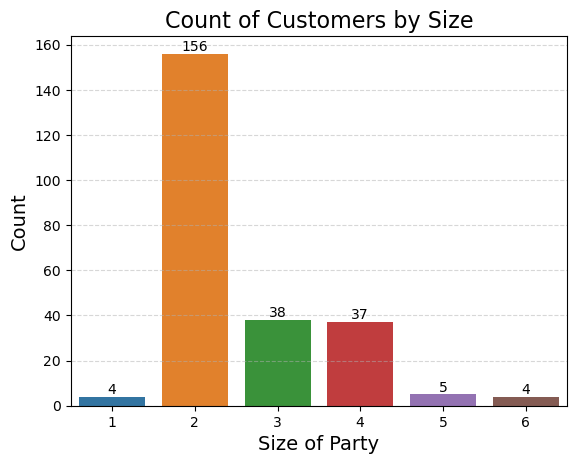

In [19]:
# even though size is a numerical column, it represents the size of the party, which is categorical in nature

ax = sns.countplot(data=tips, x='size');
plt.grid(axis='y', linestyle='--', alpha=0.5);
plt.title('Count of Customers by Size', fontsize=16)
plt.xlabel('Size of Party', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

<Axes: xlabel='size'>

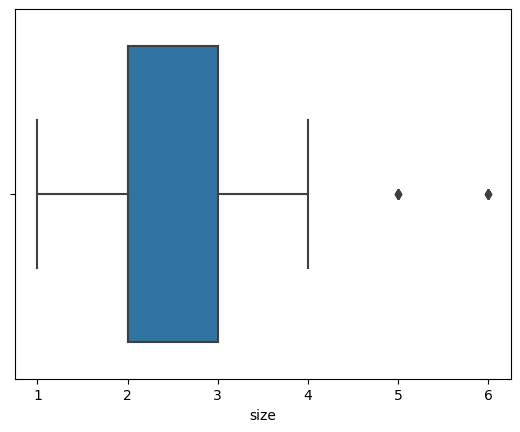

In [20]:
sns.boxplot(data=tips, x="size")

- *Majority of the customers come in groups of 2 people (~160).*
- *50% of the groups have 2 to 3 people in them.*
- *5 and 6 are outliers*

### Categorical Variables

#### Understanding the distribution of `day`

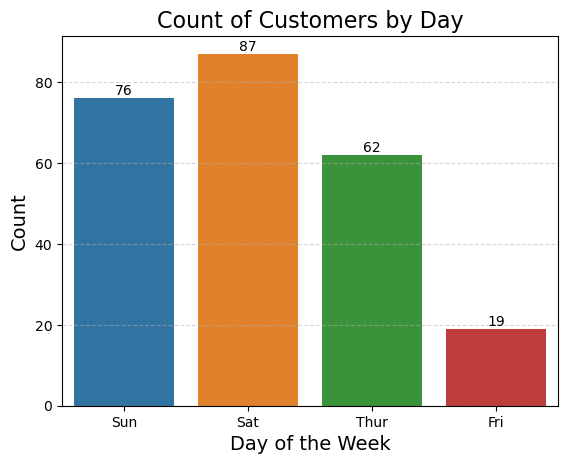

In [21]:
ax = sns.countplot(data=tips, x='day')
plt.grid(axis='y', linestyle='--', alpha=0.5);
plt.title('Count of Customers by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)    
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.show()

- *The number of orders is more during the weekends than the weekdays*.
- *The highest number of orders is received on Saturdays*

#### Understanding the distribution of `time`

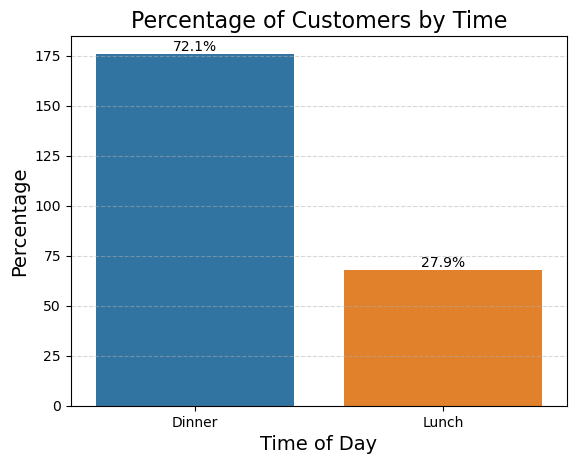

In [22]:
ax = sns.countplot(data=tips, x='time')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Percentage of Customers by Time', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

total = len(tips)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f"{percentage:.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- *The restaurant receives more orders during dinner time as compared to lunch.*

#### Understanding the distribution of `sex`

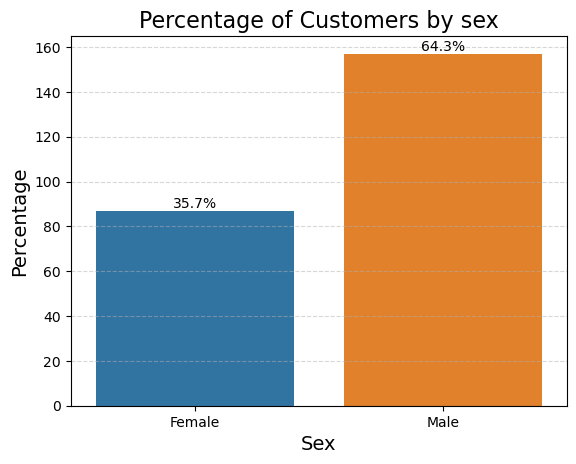

In [23]:
ax = sns.countplot(data=tips, x='sex')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Percentage of Customers by sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Percentage', fontsize=14)


total = len(tips)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f"{percentage:.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- *The number of male bill payers is around 155 while the number of female bill payers is around 85.*

#### Understanding the distribution of `smoker`

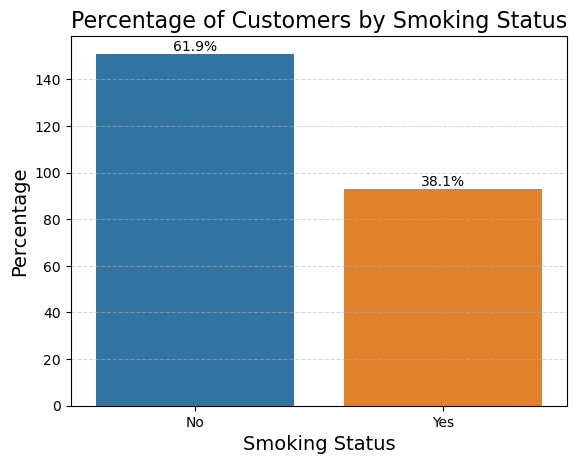

In [24]:
ax = sns.countplot(data=tips, x='smoker')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Percentage of Customers by Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Percentage', fontsize=14)   

total = len(tips)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f"{percentage:.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

- *The tables which include non-smokers is more than those which included smokers.*

### Bivariate Analysis

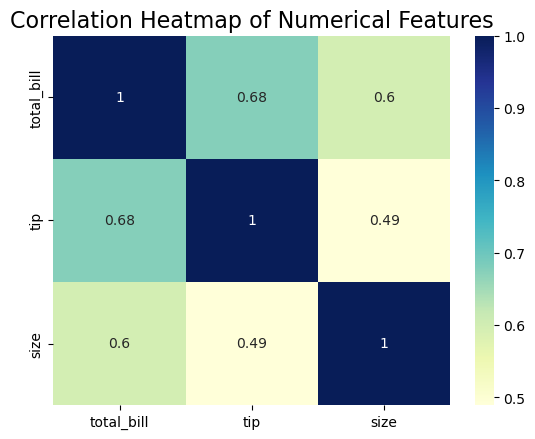

In [25]:
sns.heatmap(data=tips[['total_bill','tip','size']].corr(), annot=True, cmap='YlGnBu');
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

- *We can see that `total_bill` and `tip` columns are highly correlated with each other.*
- *The `total_bill` and `size` columns are also correlated with each other which makes sense since higher the group size, higher will be the bill amount and vice-versa*.
- *The `tip` and `size` columns are moderately related with each other.* 

**We have seen that `total_bill` and `tip` columns are highly correlated with each other. Let us verify this relationship with the help of various plots**

**Understanding the relationship between `total_bill` and `tip` using suitable plots**

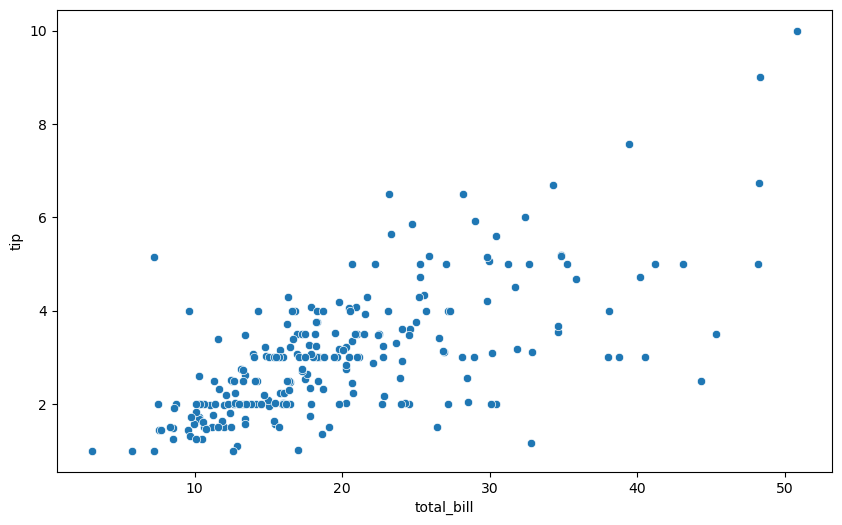

In [26]:
plt.figure(figsize=(10, 6));
sns.scatterplot(data=tips, x='total_bill', y='tip');

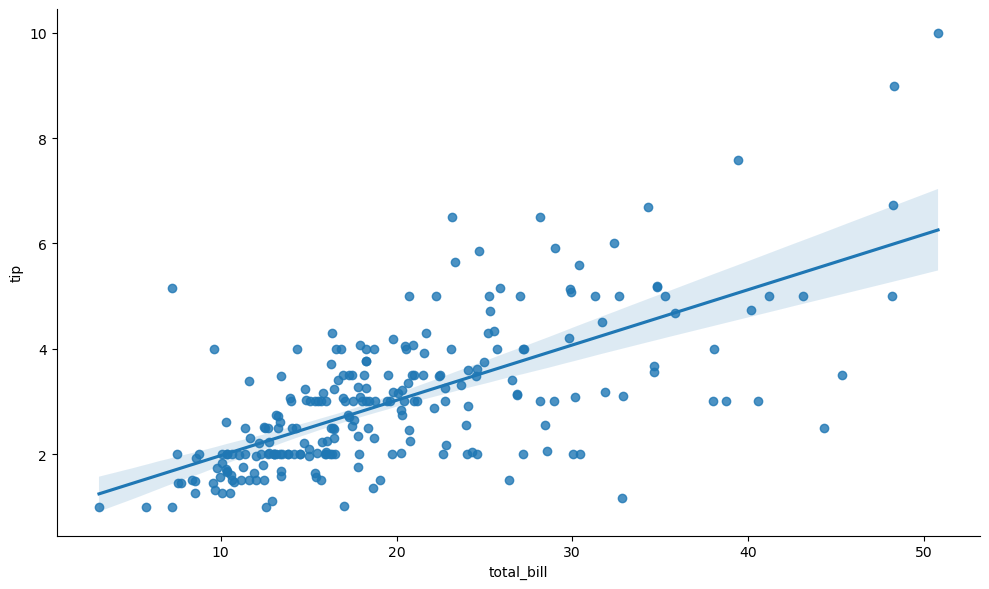

In [27]:
sns.lmplot(data=tips, x='total_bill', y='tip', height=6, aspect=10/6);

We can use the joinplot here to see the relationship between `total_bill` and `tip` as well as see their distribution, all combined in the same plot.

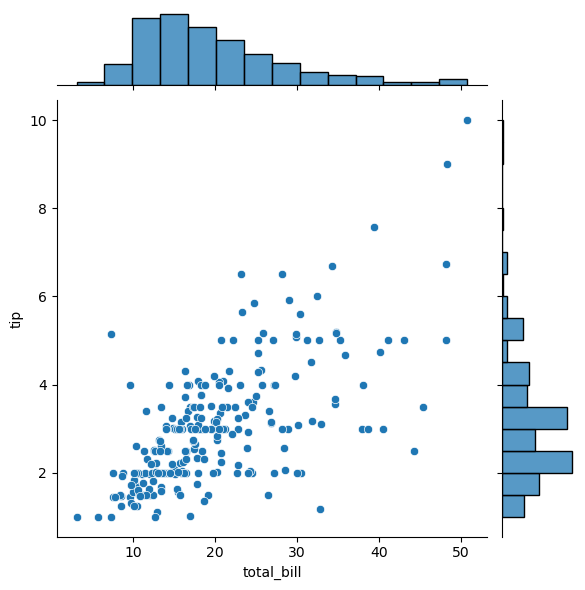

In [28]:
sns.jointplot(data=tips, x='total_bill', y='tip');

Let us create a hexbin plot by setting **kind="hex"** to take care of the overlapping of points.

- Setting **kind="hex"** actually splits the plotting window into several hexagons and the colour of each hexagon denotes the number of data points in it.

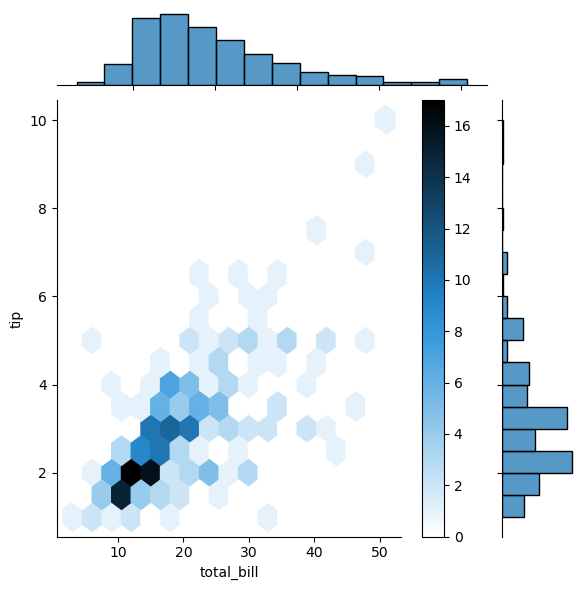

In [29]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

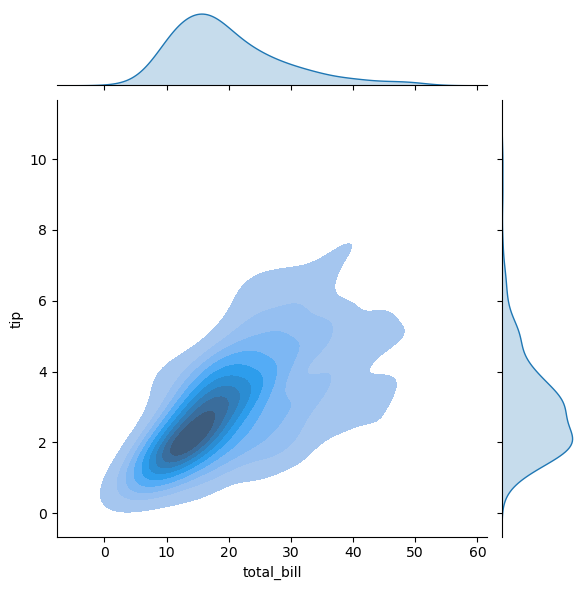

In [30]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', fill=True);

- *There is a cluster of points in the region where the billing amount ranges from 8 to 16 dollars and the tip amount ranges from 1 to 2 dollars.*

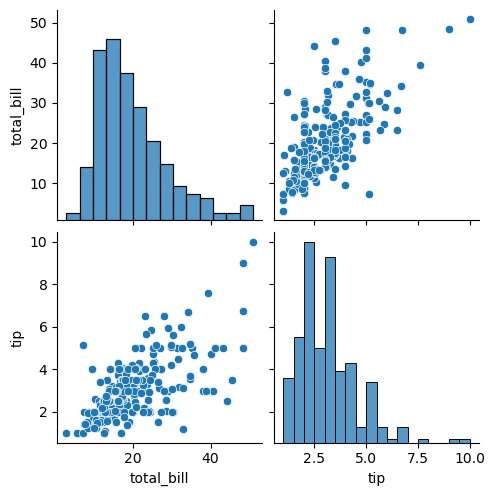

In [31]:
sns.pairplot(data = tips[['total_bill','tip']]);

- *From all the above graphs, it can be clearly seen that there is a linear relationship between `total_bill` and `tip` i.e higher the billing amount, higher is the tip amount and vice versa.*

**Is the relationship between `total_bill` and `tip` valid with respect to the gender of the bill payer, smoking status, days and time at which the customer has visited the restaurant and also the group size?**

**`sex`**

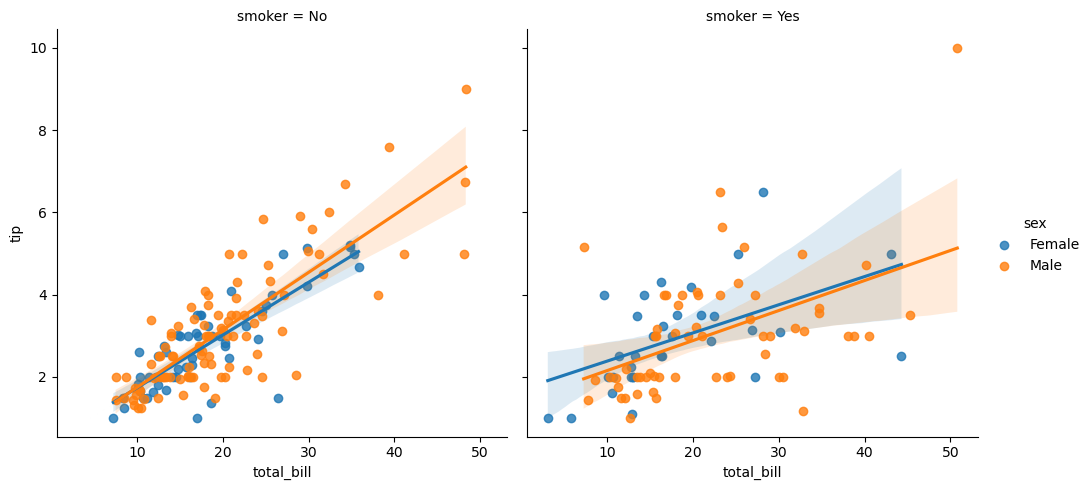

In [32]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue='sex', col='smoker');

- *The relationship between `total_bill` and `tip` is linear with respect to both the genders.*
- *There are some far away points where both the billing amount and tip amount are high and the bill payer is a male.*

**`smoker`**

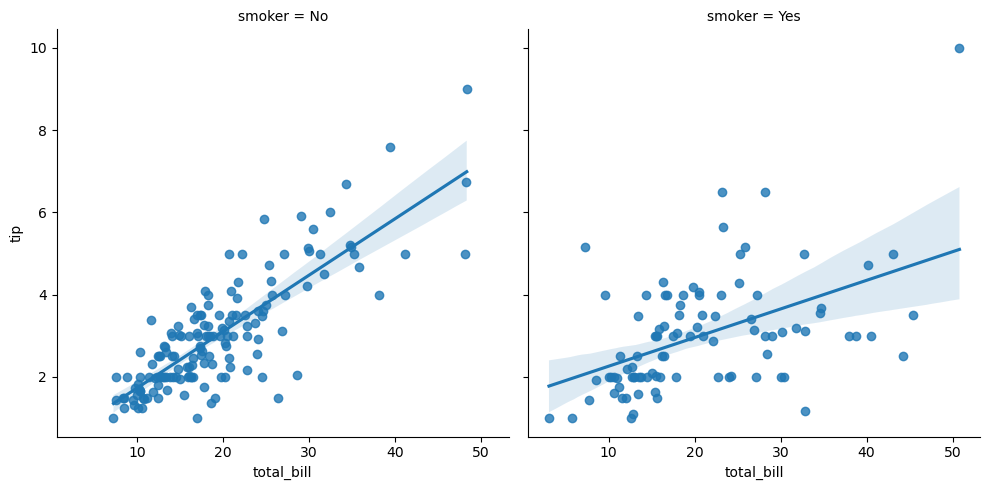

In [33]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')

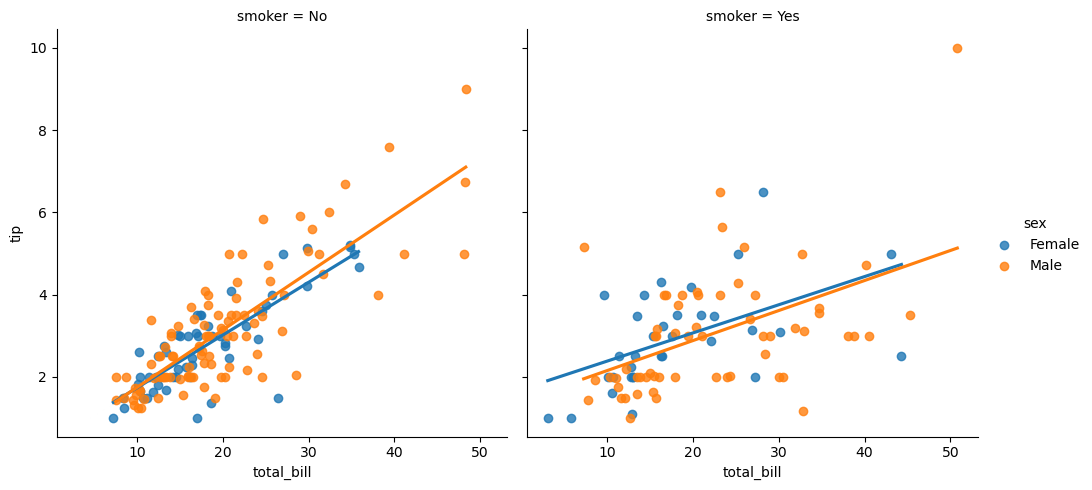

In [34]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='smoker', ci=False)

- *Highest tip was given from a table which included smokers*
- *Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers, one outlier is causing this seems*

**`day`**, **`time`**, and **`size`**

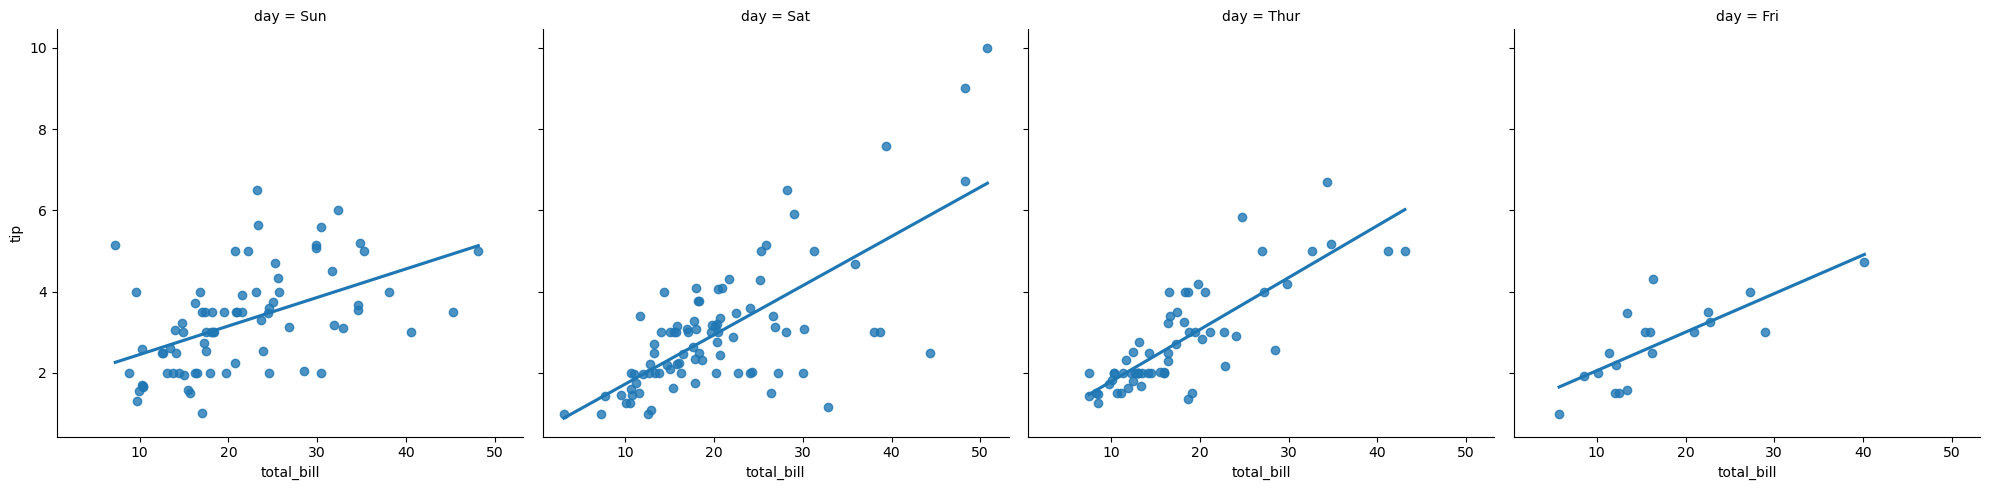

In [35]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', ci=False)

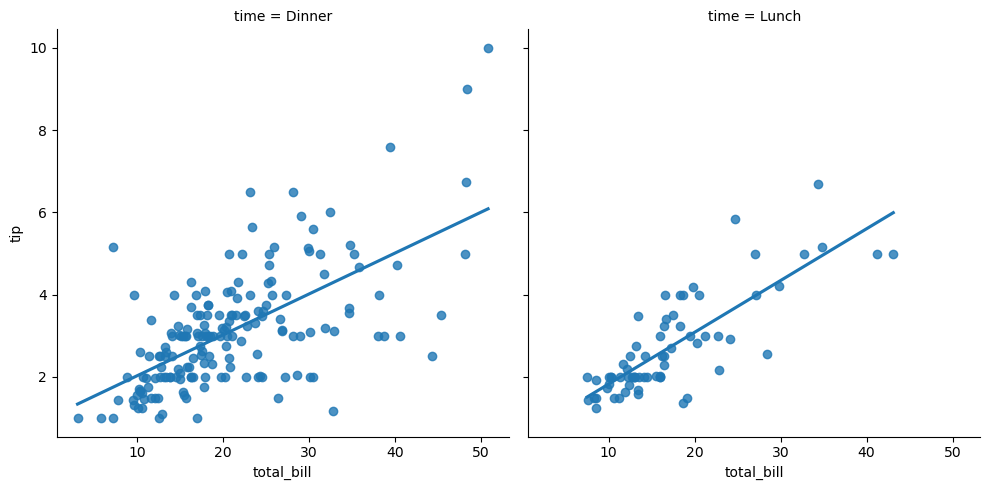

In [36]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', ci=False)

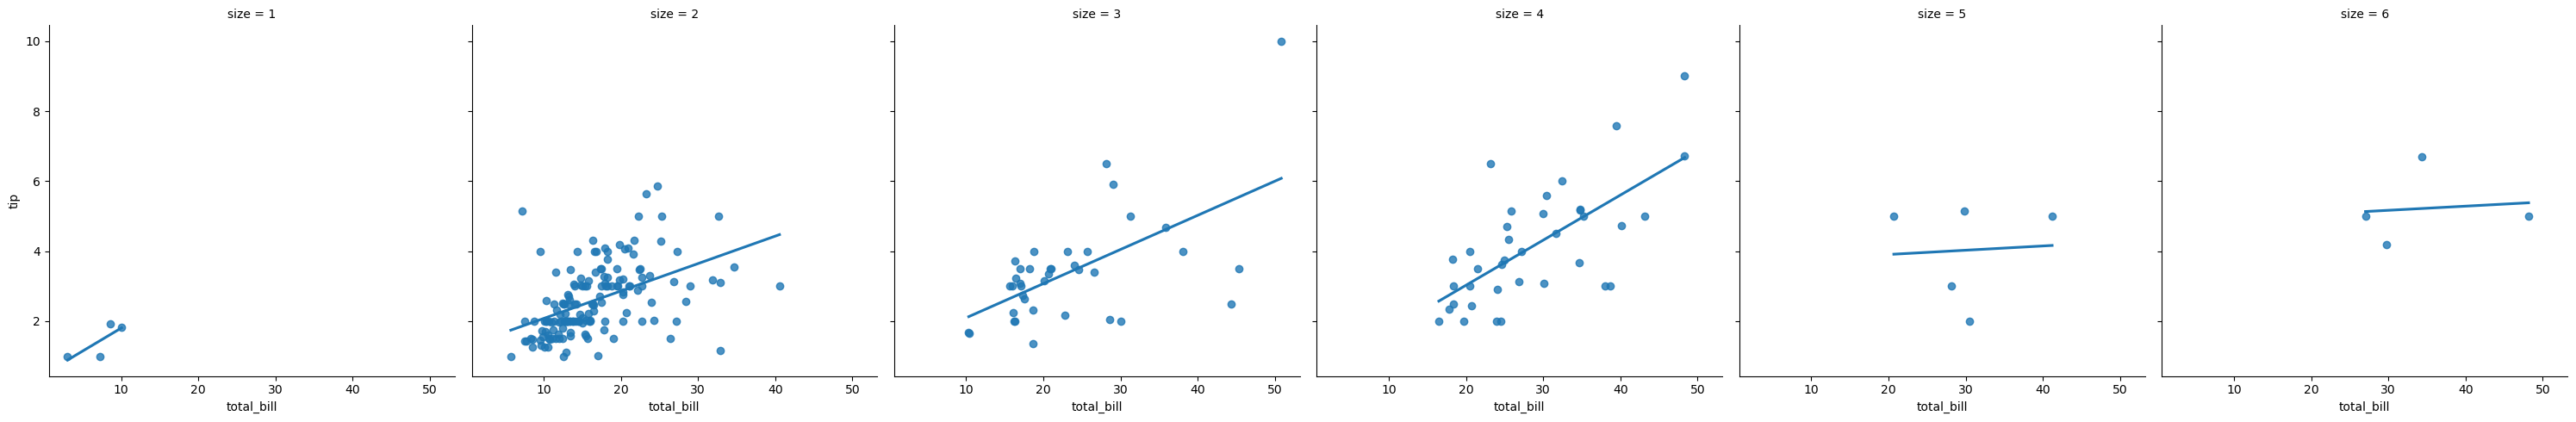

In [37]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'size', ci=False);

- *The relationship between `total_bill` and `tip` is mostly linear with respect to day and time.*
- *However with respect to size of the group, this relationship gets constant as the size of the group increases.*

**We have seen earlier that customers visit Chef's Kitchen across different days of the week.**

**How does the bill amount and tip vary with respect to the day of visit?**

<Axes: xlabel='day', ylabel='count'>

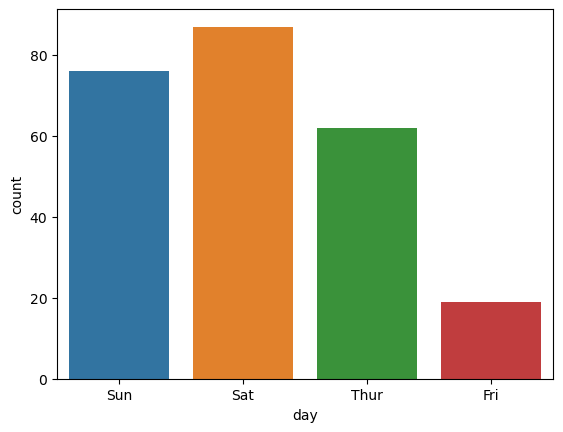

In [38]:
sns.countplot(data=tips, x='day')

- *We can see that the number of orders is higher during the weekends as compared to the weekdays*

**`total_bill`**

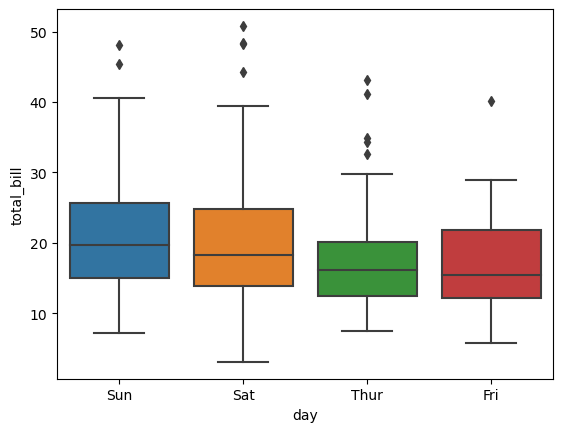

In [39]:
sns.boxplot(data=tips, x='day', y='total_bill');

- *As we can see the number of orders is lower on Fridays as compared to the other days.*
- *The number of orders is higher on weekends as compared to the weekdays.*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*

**`tip`** 

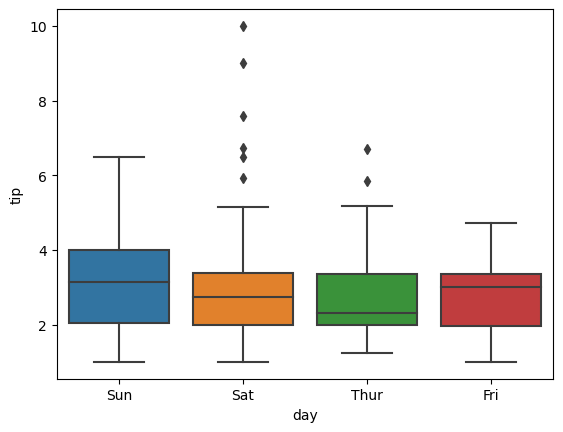

In [40]:
sns.boxplot(data=tips, x='day', y='tip');

- *We can see that the median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*

**We have already seen that the number of orders at the restaurant tend to be higher during the dinner time as compared to lunch.**

**Which time of the day brings in higher bill and tip amounts?** 

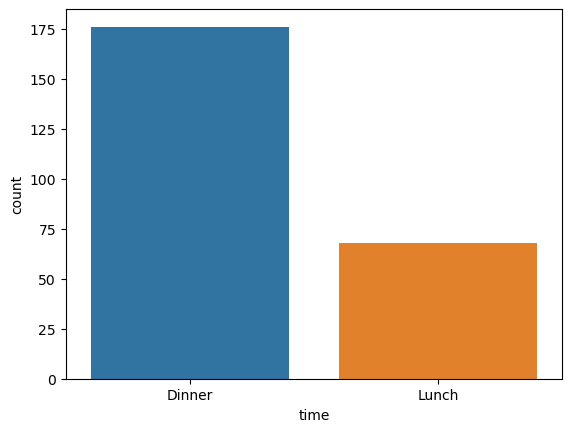

In [41]:
sns.countplot(data=tips, x='time');

- *The number of orders during dinner is nearly 2.5 times the number of orders during lunch*.

**`total_bill`**

<Axes: xlabel='time', ylabel='total_bill'>

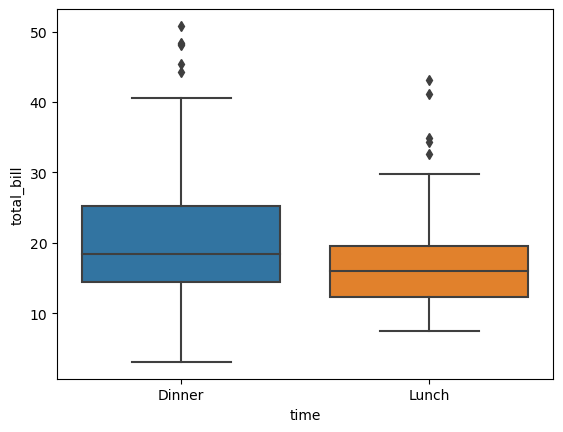

In [42]:
sns.boxplot(data=tips, x='time', y='total_bill')

- *The order count is higher during the dinner time*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*

**`tip`**

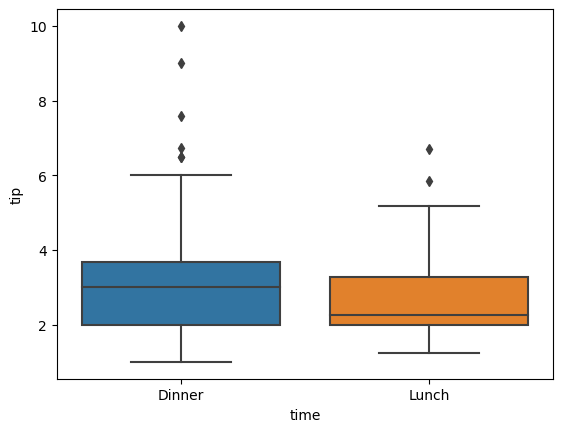

In [43]:
sns.boxplot(data=tips, x='time', y='tip');

- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*

**After doing a thorough analysis of the `day` and `time` columns, let us now move on to the other two categorical colums, `sex` and `smoker`, and try to answer some important business questions.**

**Ideally the tip amount should not vary with the gender of the bill payer. Is this assumption true with respect to the data provided? What is the count of male and female bill payers visiting each day?**


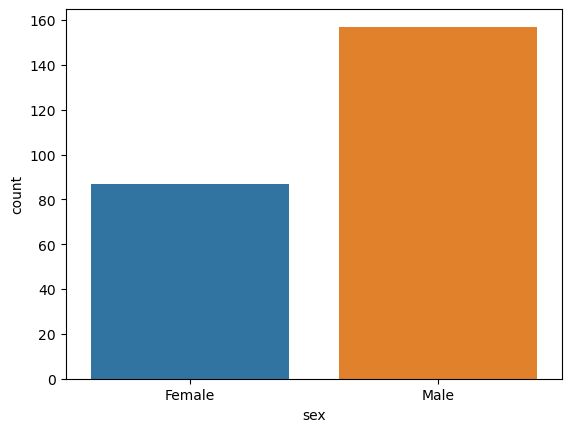

In [44]:
sns.countplot(data=tips, x='sex');

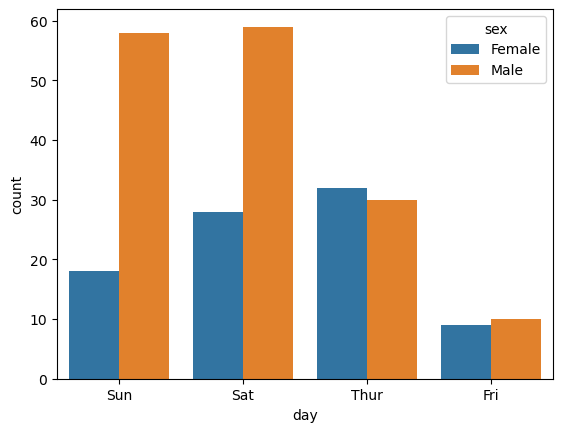

In [45]:
sns.countplot(data=tips, x='day', hue='sex');

- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the the number of male bill payers is significantly higher than the number of female bill payers.*

**Let us now see how the tip amount varies with respect to the gender of the bill payer** 

<Axes: xlabel='sex', ylabel='tip'>

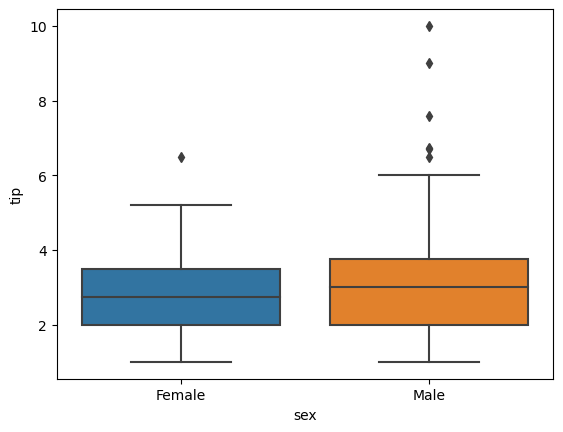

In [46]:
sns.boxplot(data=tips, x='sex', y='tip')

- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*

**Let us carry out a similar sort of analysis for `smoker` to know the distribution between the classes and see its relationship with `tip`.**

**What is the distribution between smokers and non-smokers? Do they have any relationship with 'tip'?**


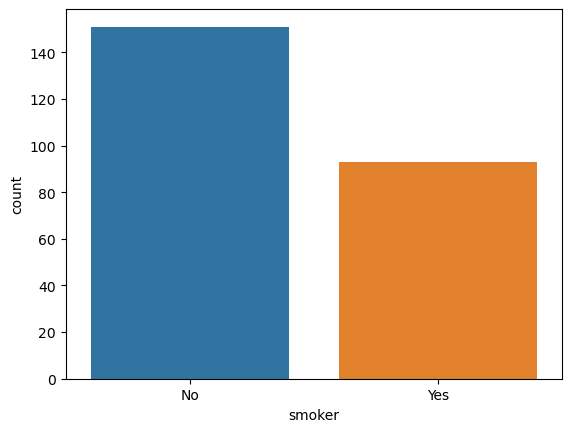

In [47]:
sns.countplot(data=tips, x='smoker');

In [48]:
tips.groupby('smoker')['tip'].mean().reset_index(name='Avg Tip Amount')

,smoker,Avg Tip Amount
0,No,2.991854
1,Yes,3.008710


- *Mean is same for both smoker and non smoker*

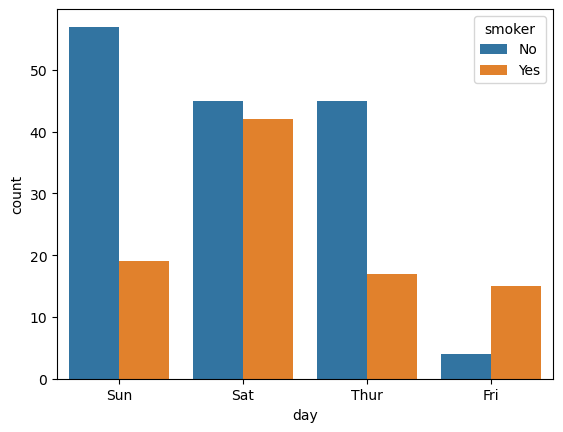

In [49]:
sns.countplot(data=tips, x='day', hue='smoker');    

- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*

<Axes: xlabel='smoker', ylabel='tip'>

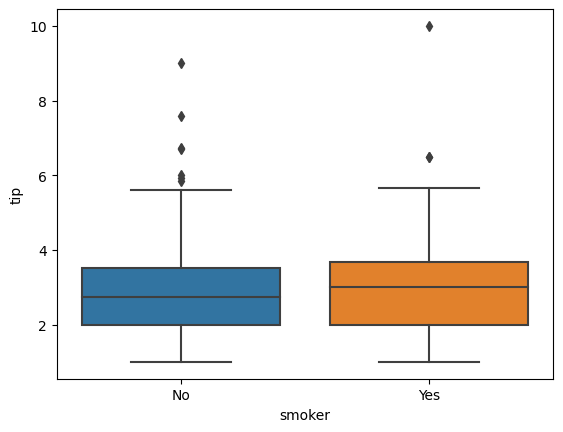

In [50]:
sns.boxplot(data=tips, x='smoker', y='tip')

- *There is no relation between smoking status and tips, the median is almost the same in both the classes`*



**Thank You !!**